In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

In [2]:
#read in dataset
pedestrians = pd.read_csv('data/PedCountLocationsMay2015.csv')

In [3]:
#examine dataset
pedestrians.describe()

,OBJECTID,LOC,May07_AM,May07_PM,May07_MD,Sept07_AM,Sept07_PM,Sept07_MD,May08_AM,May08_PM,...,Oct20_MD,May21_AM,May21_PM,May21_MD,Oct21_AM,Oct21_PM,Oct21_MD,May22_AM,May22_pM,May22_MD
count,114.000000,114.000000,112.000000,112.000000,112.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,90.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,57.500000,57.500000,1953.821429,5304.026786,3045.937500,2092.566372,5706.238938,3342.831858,1942.938053,5884.345133,...,1909.188889,933.176991,3015.707965,1831.716814,1310.389381,3410.415929,2369.486726,1506.123894,4226.823009,2706.345133
std,33.052988,33.052988,2307.229348,5384.106165,3030.042081,2422.052372,6069.554538,3579.563865,2305.090447,6754.858465,...,1247.715430,839.938659,2552.859317,1462.438610,1170.938051,2982.505100,2110.650459,1554.123071,4102.160971,2581.182978
min,1.000000,1.000000,17.000000,35.000000,34.000000,11.000000,44.000000,24.000000,7.000000,23.000000,...,53.000000,23.000000,52.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.250000,29.250000,458.750000,1358.250000,847.250000,514.000000,1414.000000,867.000000,469.000000,1367.000000,...,986.000000,348.000000,1211.000000,912.000000,494.000000,1371.000000,814.000000,437.000000,1628.000000,1063.000000
50%,57.500000,57.500000,1073.500000,3982.000000,2347.500000,1129.000000,3524.000000,2293.000000,1058.000000,4015.000000,...,1698.500000,714.000000,2442.000000,1550.000000,989.000000,2631.000000,1935.000000,995.000000,2731.000000,2085.000000
75%,85.750000,85.750000,2337.500000,7391.750000,3833.500000,2267.000000,8401.000000,4885.000000,2407.000000,7420.000000,...,2448.750000,1285.000000,4344.000000,2483.000000,1899.000000,4671.000000,3204.000000,1980.000000,5751.000000,3455.000000
max,114.000000,114.000000,12000.000000,28123.000000,14391.000000,10326.000000,32673.000000,16629.000000,12391.000000,33290.000000,...,5287.000000,4887.000000,15230.000000,7422.000000,5946.000000,16622.000000,11739.000000,8508.000000,20529.000000,15618.000000


In [4]:
#drop unnecessary features
pedestrians.drop(['the_geom', 'OBJECTID', 'LOC','Street_Nam', 'From_Stree', 'To_Street', 'Index'], axis = 1,  inplace = True)

In [5]:
#look at null values
pedestrians.isna().sum()

Borough      0
May07_AM     2
May07_PM     2
May07_MD     2
Sept07_AM    1
            ..
May22_pM     1
May22_MD     1
Oct22_AM     0
Oct22_PM     0
Oct22_MD     0
Length: 91, dtype: int64

In [6]:
cols = copy.copy(pedestrians.columns)

#some records use "ND" as placeholder for NaN, replace them here
for col in cols:
    pedestrians[col] = np.where(pedestrians[col] == "ND", None , pedestrians[col])
    pedestrians[col] = np.where(pedestrians[col] == 0, None, pedestrians[col])


In [7]:
#drop all rows with null values since we want accurate trackers
pedestrians.dropna(inplace=True)

Let's aggregate the "PM" "AM" and "MD" columns for each time recorded into a single number

In [8]:
#replace every 3 columns with a single column representing sum May07_A, May07_PM, May07_MD -> May07

for i in range(1, len(cols) - 3, 3):
    
    #fetch column name
    col_name = cols[i][0:6]
    
    #if column name contains _, replace remove it
    if col_name[-1] == "_":
        col_name = col_name[:-1]
    
    #add new column as sum the three columns
    pedestrians[col_name] = pedestrians.iloc[:, i] + \
                            pedestrians.iloc[:, i + 1] + \
                            pedestrians.iloc[:, i + 2]



In [9]:
#drop all the original columns
pedestrians.drop(cols[1:], axis = 1, inplace=True)

In [10]:
#result -> data from 42 indicators
pedestrians

,Borough,May07,Sept07,May08,Sept08,May09,Sept09,May10,Sept10,May11,...,Sept16,May17,Sept17,May18,Sept18,May19,Oct20,May21,Oct21,May22
1,Bronx,6666.0,6792.0,5296.0,6605.0,5766,7126.0,6769,5553,6839,...,10142,8911,11173,9053,8333,7625.0,3959.0,4912.0,7747.0,8637.0
2,Bronx,28534.0,26109.0,17001.0,20520.0,17535,19656.0,23652,23179,27346,...,23342,21181,22247,18909,17389,20832.0,13006.0,10920.0,13958.0,12438.0
5,Bronx,2559.0,2961.0,3044.0,2960.0,2415,2377.0,2692,2713,3038,...,4118,3574,4033,3646,3830,3391.0,2659.0,1964.0,3221.0,2645.0
6,Bronx,12344.0,12862.0,11220.0,11553.0,12472,15585.0,13066,13489,14777,...,16474,17755,16506,16821,15206,12692.0,8439.0,6571.0,10206.0,10222.0
7,Bronx,9055.0,9719.0,11294.0,6739.0,7815,9077.0,9304,8171,8932,...,8205,9279,10709,10051,8070,9638.0,6522.0,7311.0,7982.0,8045.0
9,Brooklyn,4936.0,4216.0,4345.0,4706.0,5275,4774.0,5664,5865,6398,...,6110,5680,5047,5281,5229,11721.0,5666.0,4529.0,5165.0,5648.0
10,Brooklyn,8953.0,7885.0,10674.0,9656.0,9163,8963.0,9952,10760,9757,...,8915,11117,10066,10307,8936,9850.0,6311.0,6706.0,8047.0,9137.0
11,Brooklyn,9062.0,9677.0,10853.0,10361.0,10129,7699.0,9594,9050,10963,...,13311,12406,10083,10518,10689,10930.0,7595.0,5790.0,6875.0,7247.0
13,Brooklyn,9746.0,8748.0,9648.0,10777.0,11155,11182.0,12140,11047,14697,...,16725,17875,12265,15796,17792,17325.0,9731.0,9495.0,13025.0,15598.0
14,Brooklyn,12350.0,12540.0,17150.0,14168.0,13452,13267.0,12070,12667,11379,...,12553,12837,11717,12316,11287,11849.0,8890.0,8135.0,8752.0,9177.0


In [11]:
#aggregate sum by borough
borough_data = pedestrians.groupby("Borough").sum()
borough_data

,May07,Sept07,May08,Sept08,May09,Sept09,May10,Sept10,May11,Sept11,...,Sept16,May17,Sept17,May18,Sept18,May19,Oct20,May21,Oct21,May22
Borough,,,,,,,,,,,,,,,,,,,,,
Bronx,59158.0,58443.0,47855.0,48377.0,46003,53821.0,55483,53105,60932,55755,...,62281,60700,64668,58480,52828,54178.0,34585.0,31678.0,43114.0,41987.0
Brooklyn,119636.0,116381.0,122346.0,116228.0,119999,114366.0,120775,119387,128044,118093,...,127702,131712,122357,125377,119641,139462.0,82466.0,80043.0,97932.0,102730.0
Manhattan,307299.0,338805.0,319436.0,316867.0,291469,317072.0,315757,326911,326356,328171,...,335314,348469,356739,344647,348061,309334.0,100056.0,153541.0,200880.0,243541.0
Queens,79229.0,87165.0,77700.0,75855.0,80764,79723.0,84815,91110,93997,91749,...,78763,88552,86748,83708,80370,79384.0,52402.0,59200.0,68608.0,65072.0
Staten Island,2895.0,3126.0,3625.0,4410.0,3952,3253.0,3233,3712,3243,3098,...,3962,3784,3770,5233,4252,4648.0,1351.0,1044.0,2030.0,2231.0


In [12]:
#transpose our dataframe so it is easier to plot
borough_data_T = borough_data.transpose()

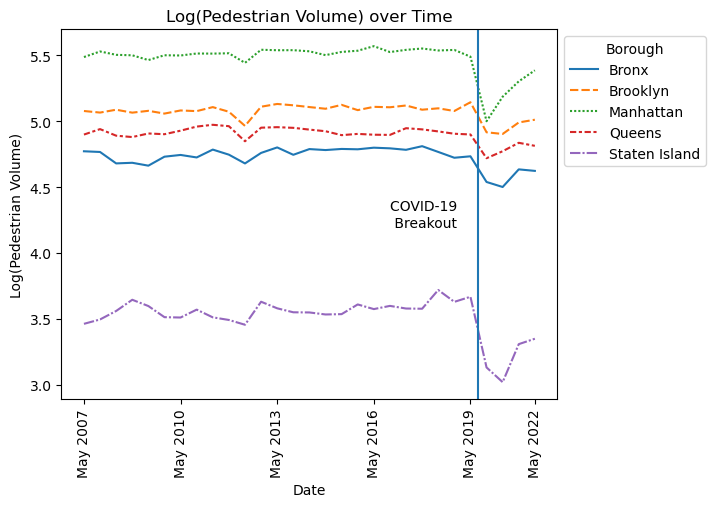

In [14]:
#plot log(pedestrian volume) over time
ax = sns.lineplot(data = np.log10(borough_data_T))
xticks = ["May07", "May10", "May13", "May16", "May19", "May22"]
ax.set_xticks(xticks)
ax.set_xticklabels(labels = ["May 2007", "May 2010", "May 2013", "May 2016", "May 2019", "May 2022"], rotation=90)
ax.set(xlabel='Date', ylabel='Log(Pedestrian Volume)', title = "Log(Pedestrian Volume) over Time")
ax.axvline(24.5)
ax.text(19,4.2,'COVID-19 \n Breakout',)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("output/Pedestrian_output/Pedestrian_AllBorough.png", bbox_inches='tight')
plt.show()

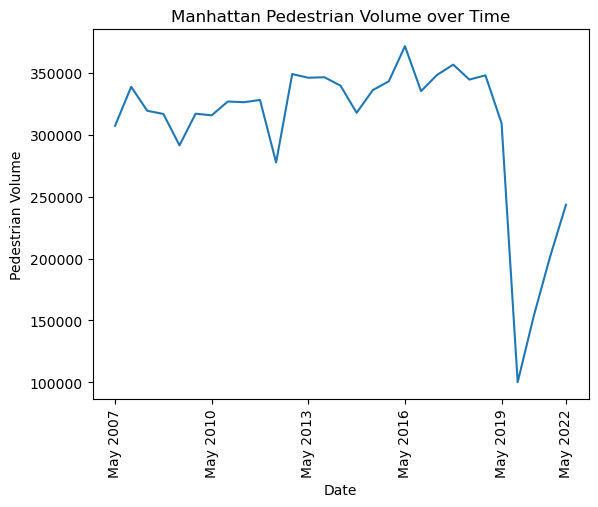

In [16]:
#plot manhattan pedestrian volume over time
ax = sns.lineplot(data = borough_data_T["Manhattan"])
xticks = ["May07", "May10", "May13", "May16", "May19", "May22"]
ax.set_xticks(xticks)
ax.set_xticklabels(labels = ["May 2007", "May 2010", "May 2013", "May 2016", "May 2019", "May 2022"], rotation=90)
ax.set(xlabel='Date', ylabel='Pedestrian Volume', title = "Manhattan Pedestrian Volume over Time")
plt.savefig("output/Pedestrian_output/Pedestrian_Manhattan.png", bbox_inches='tight')
plt.show()